In [33]:
%load_ext autoreload
%autoreload 2
import numpy as np
from obspy import UTCDateTime
from matplotlib import pyplot as plt
import matplotlib as mpl
import ground_motion_qh
from ground_motion_qh.earthquake import EarthquakeCatalog
from ground_motion_qh.get_waveforms import get_stream_multiple_stations, raw_stream_to_amplitude_and_times
import os
from pathlib import Path
from pprint import pprint

base_dir = Path(ground_motion_qh.__file__).parent.parent

mpl.rcParams['figure.dpi'] = 300

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [28]:
download_name = "ANZA_hero_run_1982_M35"
data_dir = base_dir / "data" / "raw_data" / download_name

# explanation of buffers:

# (hypocenter) t1                                                                                            t2
# t0 time shift    pre-buffer     event time window     mid buffer     forecast time window      post buffer
# |------------||--------------||-------------------||--------------||---------- ... ---------||-------------|

analysis_metadata = np.load(data_dir / "metadata.npy", allow_pickle=True).item()

In [29]:
analysis_metadata

{'earthquake_metadata': {'starttime': '1994-01-01',
  'endtime': '2023-01-01',
  'latitude_range': [32, 35],
  'longitude_range': [-117.5, -115.5],
  'minimum_magnitude': 3.5},
 'analysis_metadata': {'mid_buffer': 10,
  'forecast_time_window': 3600,
  'event_time_window': 30,
  'shift_times': True,
  'pre_buffer': 220.0,
  'post_buffer': 220.0},
 'station_metadata': {'stname': ['SND'],
  'network': 'AZ',
  'org': 'IRIS',
  'latitude': 33.5519,
  'longitude': -116.6129,
  'start_time': '1982-10-01',
  'number_of_tries': 2}}

In [30]:
earthquakes = EarthquakeCatalog(
    filename=data_dir / "local_catalog.csv",
    kwargs=analysis_metadata["earthquake_metadata"],
)

/Users/kdascher/Documents/Documents/USU/Projects/Exploratory_projects/GroundMotion_QH/ground_motion_qh/earthquake.py:218: UserWarning: Using existing /Users/kdascher/Documents/Documents/USU/Projects/Exploratory_projects/GroundMotion_QH/data/raw_data/ANZA_hero_run_1982_M35/local_catalog.csv
  warnings.warn(f"Using existing {filename}")


<Axes: xlabel='Time', ylabel='mag'>

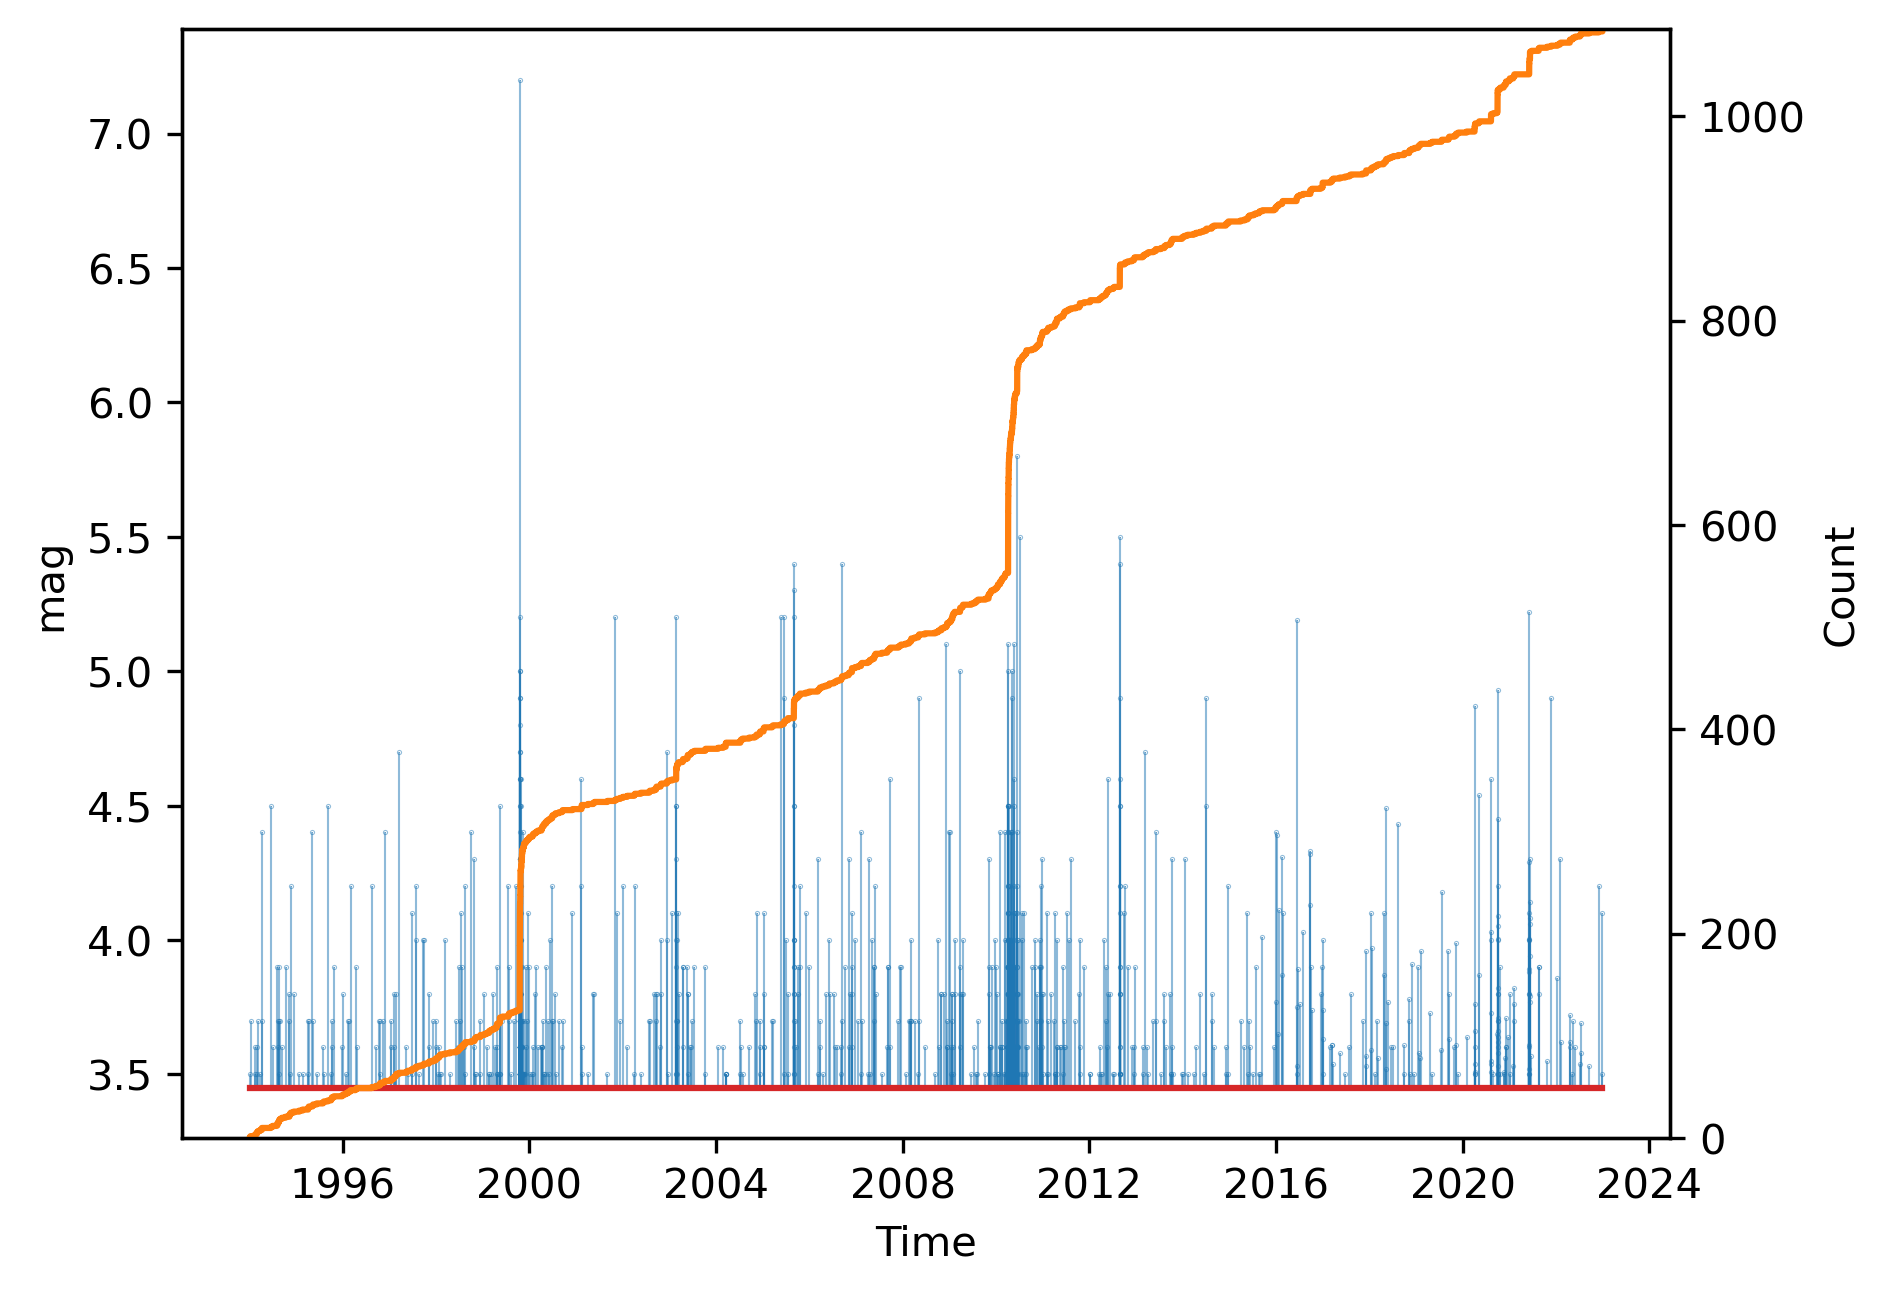

In [34]:
earthquakes.plot_time_series()

<GeoAxes: xlabel='Longitude', ylabel='Latitude'>

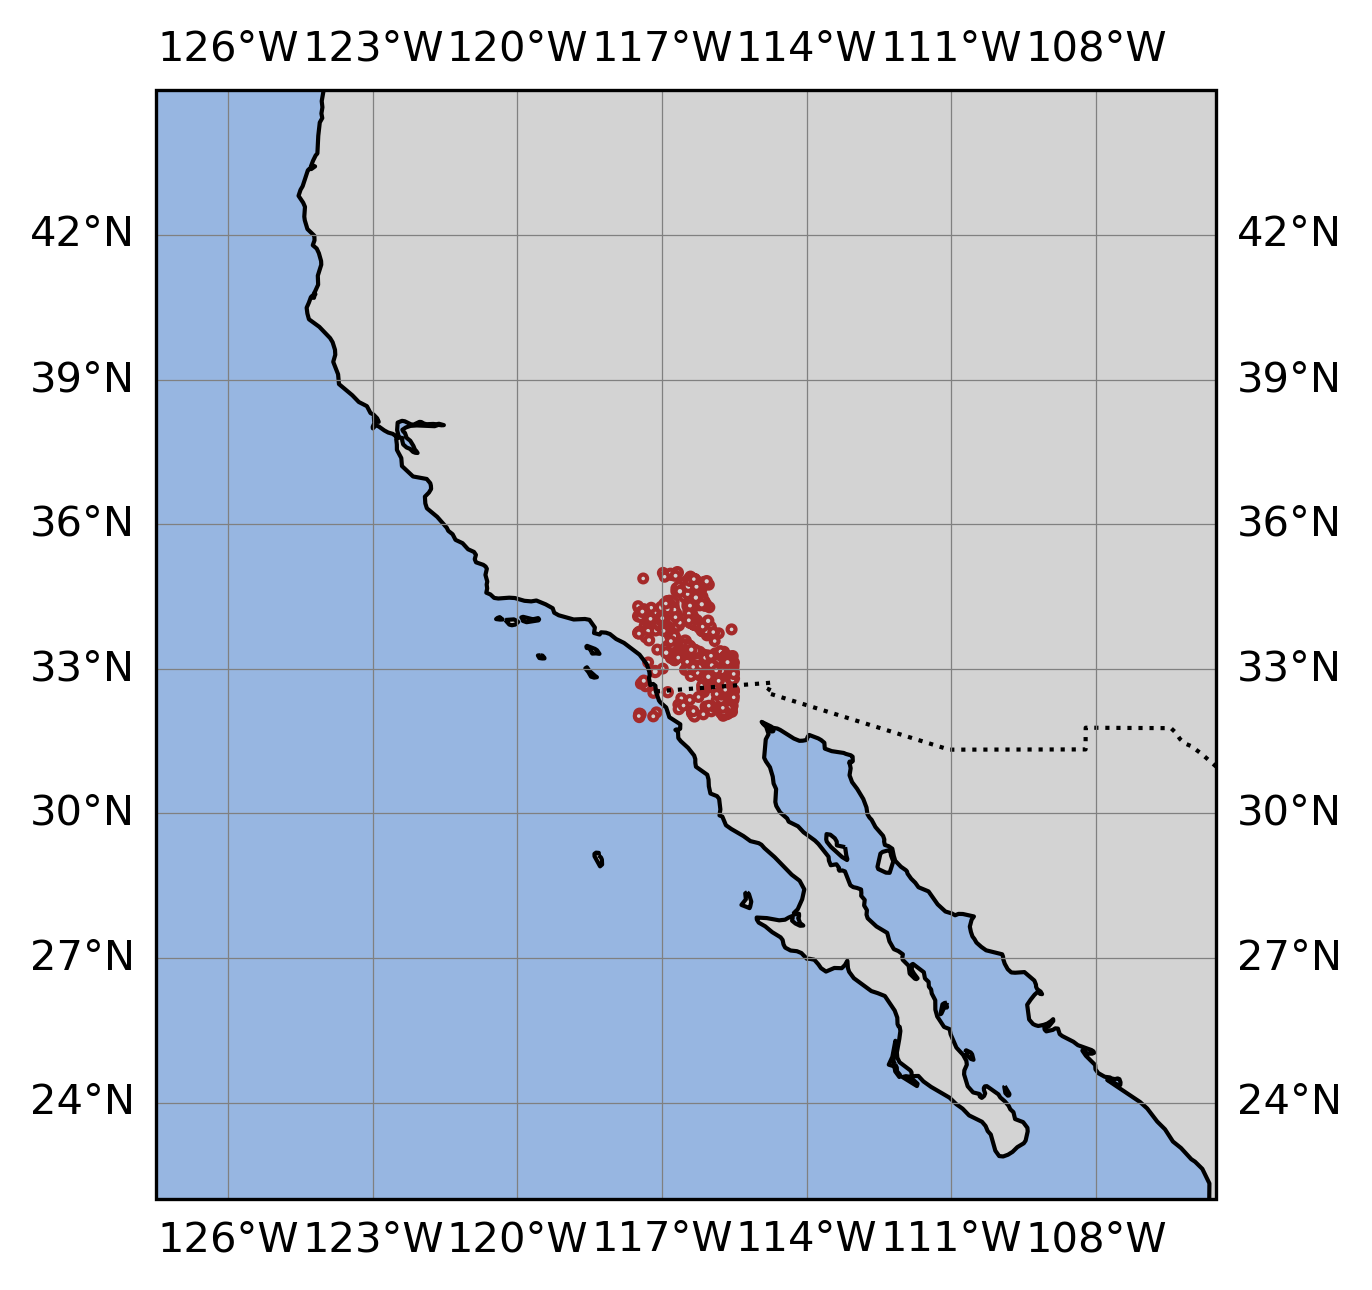

In [43]:
extent_buffer = 10
earthquakes.plot_map(extent=[-117.5 - extent_buffer, -115.5 + extent_buffer, 32 - extent_buffer, 35 + extent_buffer ])

In [51]:
folder_names = os.listdir(data_dir/"data")
total_number_of_samples = len(folder_names)

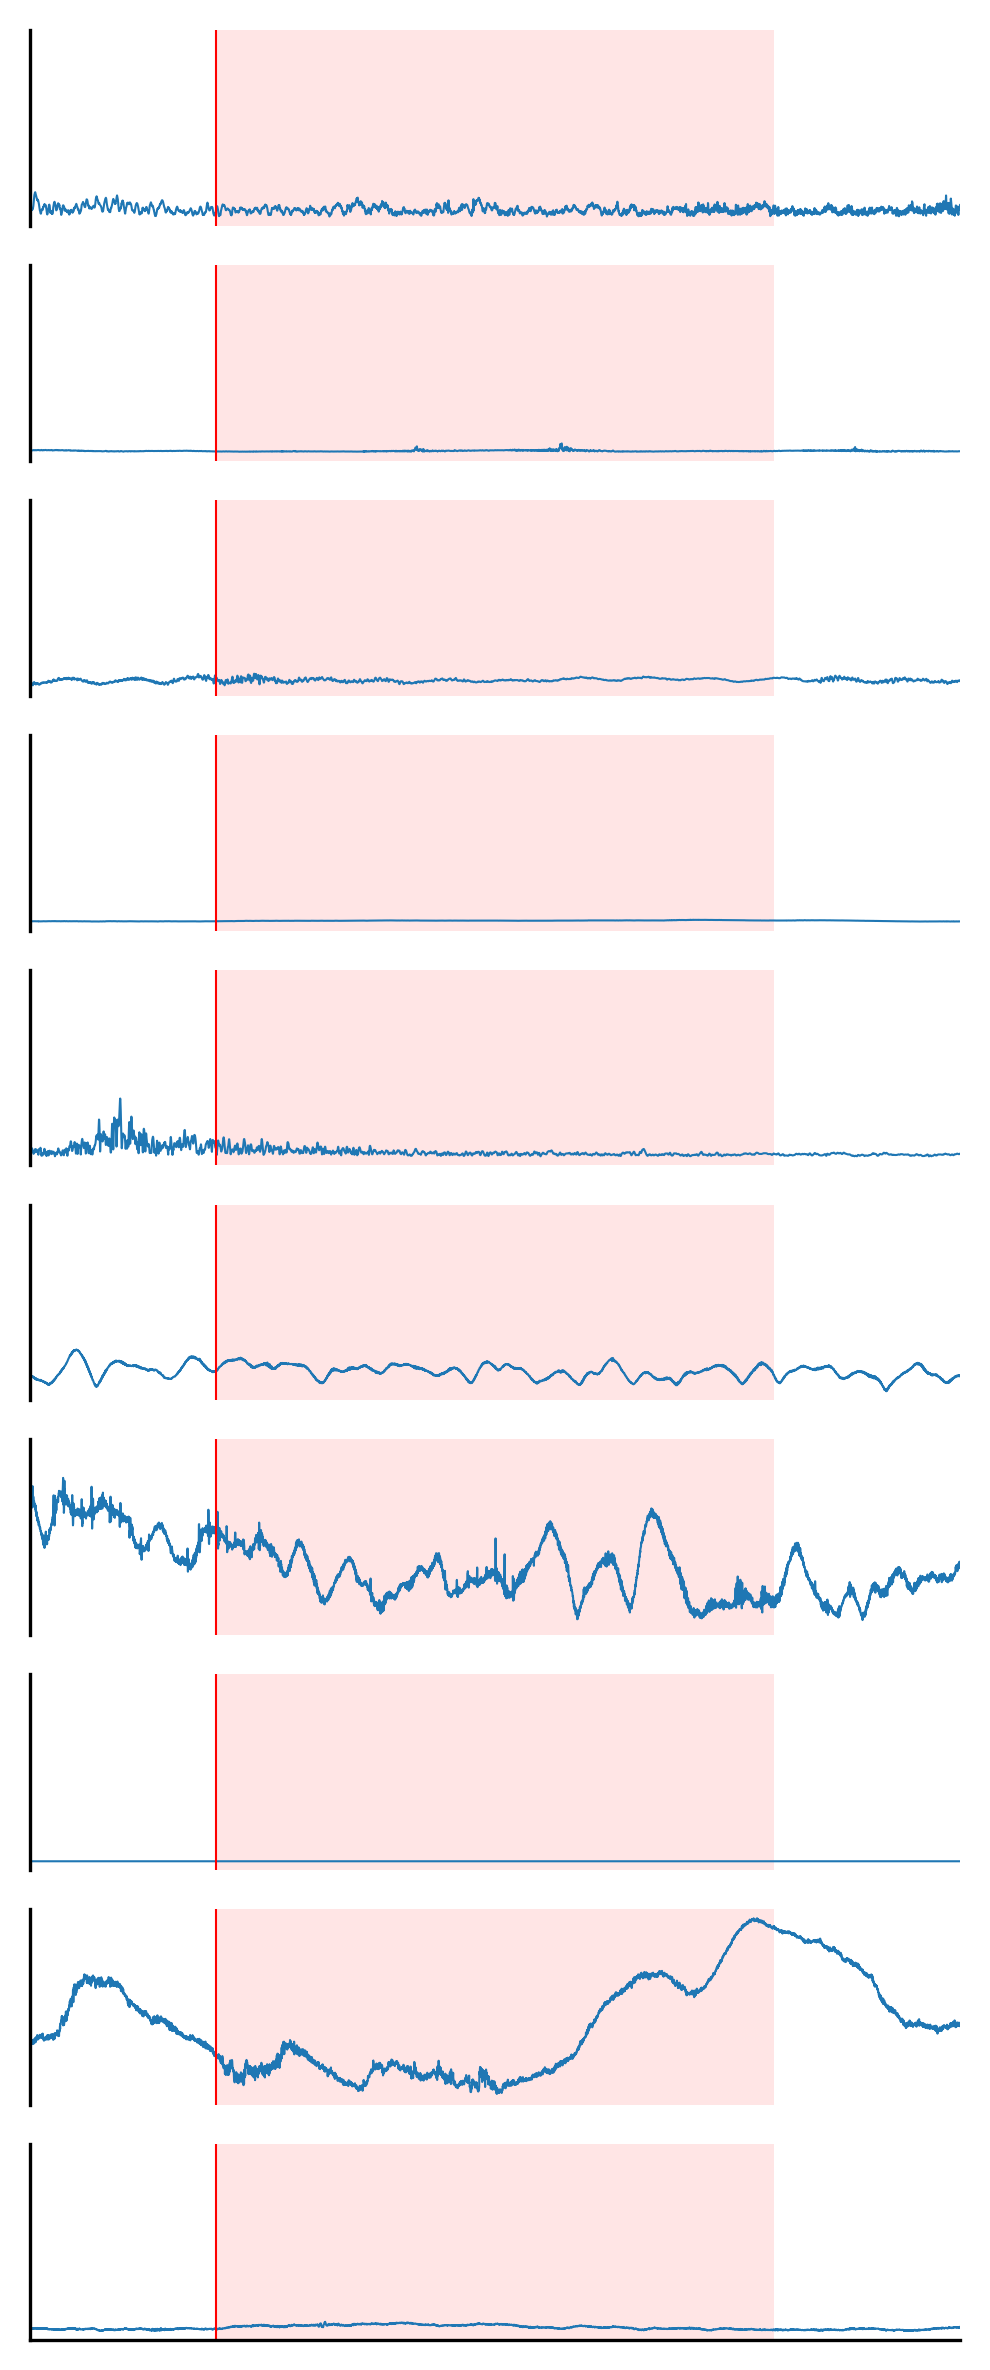

In [71]:
number_of_samples = 10
random_sample_indices = np.random.randint(0, total_number_of_samples, number_of_samples)

fig, ax = plt.subplots(number_of_samples, 1, sharex=True, figsize=(4, number_of_samples))

for i, random_sample_index in enumerate(random_sample_indices):
    # np.save(event_dir / "amplitude.npy", amplitude)
    # np.save(event_dir / "times.npy", times)
    
    # load these files
    amplitude = np.load(data_dir/"data"/folder_names[i]/"amplitude.npy")
    times = np.load(data_dir/"data"/folder_names[i]/"times.npy")
    
    # plot the waveform
    ax[i].plot(times, amplitude,lw=0.5)
    
    ax[i].set(
        yticks=[],
        xticks=[],
    )
    
    ax[i].axvspan(
        analysis_metadata['analysis_metadata']['pre_buffer'],
        analysis_metadata['analysis_metadata']['pre_buffer'] + analysis_metadata['analysis_metadata']['event_time_window'],
        facecolor='r',
        alpha=0.1,
    )
    
    ax[i].axvline(
        analysis_metadata['analysis_metadata']['pre_buffer'],
        lw=0.5,
        c='r',
    )
    
    ax[i].set(
        xlim=[
            analysis_metadata['analysis_metadata']['pre_buffer'] - analysis_metadata['analysis_metadata']['mid_buffer'], 
            analysis_metadata['analysis_metadata']['pre_buffer'] + analysis_metadata['analysis_metadata']['event_time_window'] + analysis_metadata['analysis_metadata']['mid_buffer']
        ]
    )
    
    ax[i].spines['top'].set_visible(False)
    ax[i].spines['right'].set_visible(False)
    
    if i != number_of_samples - 1:
        ax[i].spines['bottom'].set_visible(False)
        
    
    
    